In [43]:
# 📦 Importação de bibliotecas necessárias
import numpy as np  # 🧮 Biblioteca para cálculos numéricos com arrays multidimensionais
from sklearn import datasets  # 📚 Conjuntos de dados prontos para machine learning
from sklearn.model_selection import train_test_split  # ✂️ Divisor de dados em treino/teste
from sklearn.preprocessing import StandardScaler  # 🔢 Normalizador/padronizador de dados
from sklearn.neighbors import KNeighborsClassifier  # 🏷️ Algoritmo KNN para classificação
from matplotlib.colors import ListedColormap  # 🎨 Cores para visualização
import matplotlib.pyplot as plt  # 📊 Biblioteca para plotagem de gráficos

In [44]:
# 🌸 Carrega o famoso dataset Iris (conjunto de dados de flores íris)
iris = datasets.load_iris()

In [45]:
# 🌸 Selecionando apenas as colunas 2 e 3 (pétalas) do dataset Iris para X
X = iris.data[:, [2, 3]]  # 📏 Pegamos apenas comprimento e largura das pétalas

# 🎯 Selecionando o vetor de classes/alvos (espécies de íris) para y
y = iris.target  # 0=setosa, 1=versicolor, 2=virginica

In [46]:
# ✂️ Dividindo os dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X,                     # Features (comprimento e largura das pétalas)
    y,                     # Rótulos (espécies de íris)
    test_size=0.3,         # 30% dos dados serão usados para teste
    random_state=0         # Semente aleatória para reprodutibilidade
)

# 📊 Mostrando o tamanho dos conjuntos criados
print(f'Existem {X_train.shape[0]} amostras de treino e {X_test.shape[0]} amostras de teste.')

Existem 105 amostras de treino e 45 amostras de teste.


In [47]:
# 🏗️ Cria o normalizador de dados (média=0, desvio=1)
sc = StandardScaler()  

# 📊 Calcula média e desvio padrão DOS DADOS DE TREINO
sc.fit(X_train)  

# ✨ Aplica normalização nos dados de TREINO
X_train_normalizado = sc.transform(X_train)  

# 🔄 Aplica a MESMA normalização nos dados de TESTE
X_test_normalizado = sc.transform(X_test)  

# 🧱 Empilha dados de treino+teste normalizados verticalmente
X_normalizado = np.vstack((X_train_normalizado, X_test_normalizado))  

# ➕ Concatena os rótulos de treino+teste horizontalmente  
y_normalizado = np.hstack((y_train, y_test))  

C:\Users\Felipe\AppData\Local\Temp\ipykernel_20100\1202668311.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


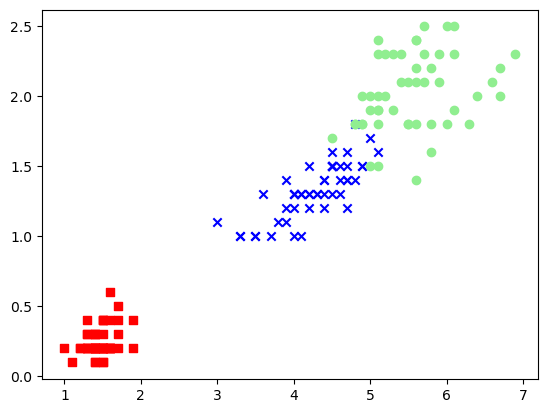

In [48]:
# 🎨 Configuração dos estilos de plotagem
markers = ('s', 'x', 'o')          # 🔷🔶🔵 Símbolos para cada classe
colors = ('red', 'blue', 'lightgreen')  # 🟥🟦🟩 Cores para cada classe
cmap = ListedColormap(colors[:len(np.unique(y_test))])  # 🎨 Cria mapa de cores

# 📊 Loop para plotar cada classe
for idx, cl in enumerate(np.unique(y)):  # 🔄 Para cada classe única
    plt.scatter(
        x=X[y == cl, 0],  # 🏹 Eixo X: primeira feature (comprimento pétala)
        y=X[y == cl, 1],  # 🏹 Eixo Y: segunda feature (largura pétala)
        c=cmap(idx),      # 🎨 Cor correspondente à classe
        marker=markers[idx],  # 🔶 Símbolo correspondente
        label=f'Classe {cl}'  # 🏷️ Rótulo para legenda (0=Setosa, 1=Versicolor, 2=Virginica)
    )

# ✨ A plotagem resultante mostrará:
# 🔴 Setosa (quadrados)
# 🔵 Versicolor (xis)
# 🟢 Virginica (círculos)

In [49]:
# 🤖 Criando o classificador KNN com 5 vizinhos
knn = KNeighborsClassifier(
    n_neighbors=5,    # 👥 Número de vizinhos a considerar
    p=2,              # 📏 Distância Euclidiana (p=2)
    metric='minkowski' # 📐 Métrica de distância padrão
)

# 🎓 Treinando o modelo com dados NORMALIZADOS
knn.fit(X_train_normalizado, y_train)  # 📚 Aprende padrões nos dados

# 📊 Avaliando desempenho
print(f'A acurácia do KNN na base de treino é {knn.score(X_train_normalizado, y_train):.2f}')  # 🏋️‍♂️
print(f'A acurácia do KNN na base de teste é: {knn.score(X_test_normalizado, y_test):.2f}')     # 🧪

A acurácia do KNN na base de treino é 0.95
A acurácia do KNN na base de teste é: 1.00
